In [1]:
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
import data_process
%matplotlib inline

In [2]:
figsize=(20,15)

In [3]:
datasets = data_process.read_all()

# filter datasets

In [10]:
def filter_datasets_by_tone():
    dataset_by_tone = [{} for _ in xrange(5)]
    for name, dataset in datasets.iteritems():
        for datum in dataset:
            if name not in dataset_by_tone[datum.tone]:
                dataset_by_tone[datum.tone][name] = []
            dataset_by_tone[datum.tone][name].append(datum)
    return dataset_by_tone
datasets_by_tone = filter_datasets_by_tone()

# raw data vs interpolatation & strip_zeros_by_energy

In [11]:
sample_raw_data_index = [random.randrange(0, len(datasets_by_tone[i]['train'])) for i in xrange(1, 5)]
sample_raw_data = [datasets_by_tone[i]['train'][j] for i, j in zip(xrange(1, 5), sample_raw_data_index)]
data_process.strip_zeros_by_energy(datasets, 0.15)
data_process.fix_length_by_interpolatation(datasets, 200)
datasets_by_tone = filter_datasets_by_tone()
sample_processed_data = [datasets_by_tone[i]['train'][j] for i, j in zip(xrange(1, 5), sample_raw_data_index)]

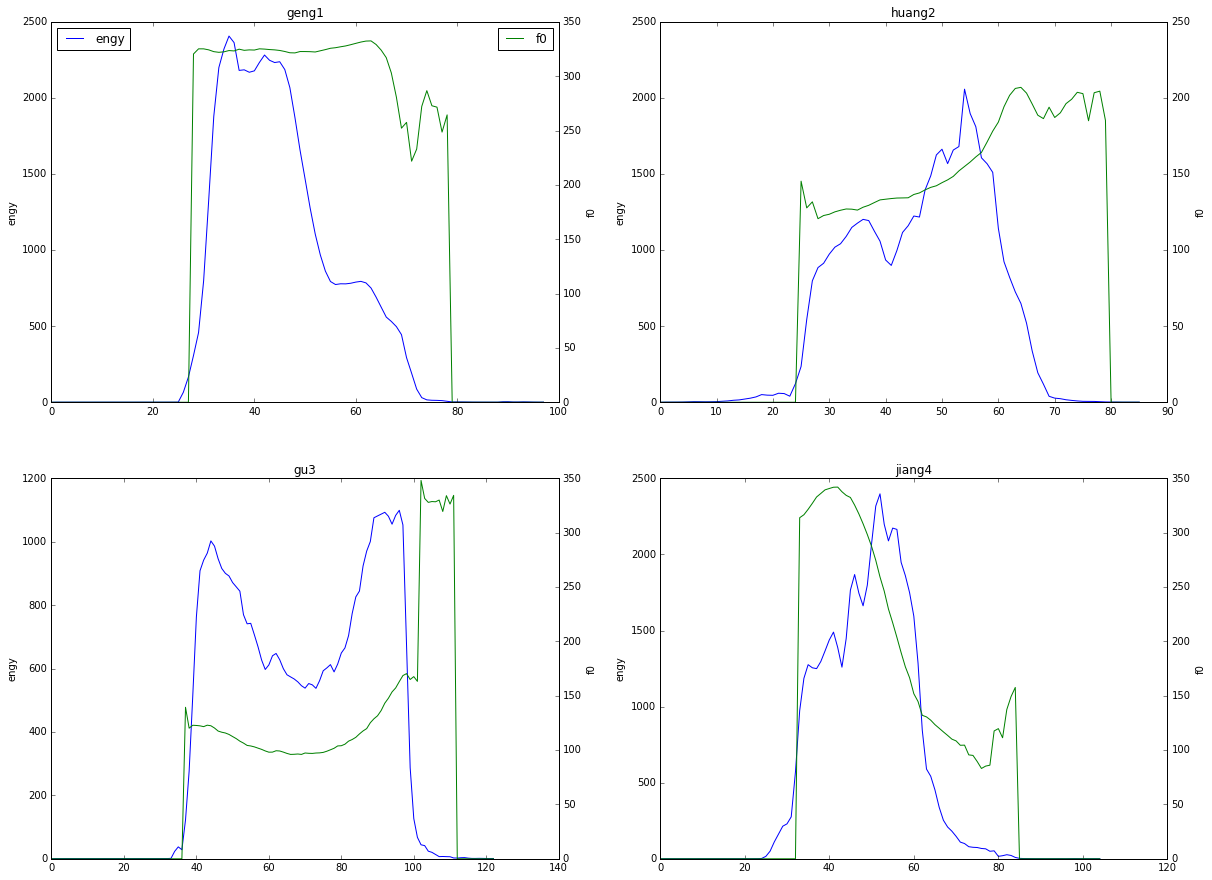

In [24]:
def plot_data_engy_f0(data, outname):
    fig = plt.figure(figsize=figsize)
    for i, datum in enumerate(data):
        ax1 = plt.subplot(2, 2, i+1)
        xs = np.arange(len(datum.f0))
        plt_engy = ax1.plot(xs, datum.engy, 'b-', label='engy')
        if i == 0:
            plt.legend(loc='upper left')
        ax1.set_ylabel('engy')
        ax2 = ax1.twinx()
        plt_f0 = ax2.plot(xs, datum.f0, 'g-', label='f0')
        if i == 0:
            plt.legend(loc='upper right')
        ax2.set_ylabel('f0')
        plt.title(datum.pinyin + str(datum.tone))
    fig.savefig(outname, dpi=300)
    plt.show()
    plt.close()

plot_data_engy_f0(sample_raw_data, '../doc/raw_data_engy_f0.eps')

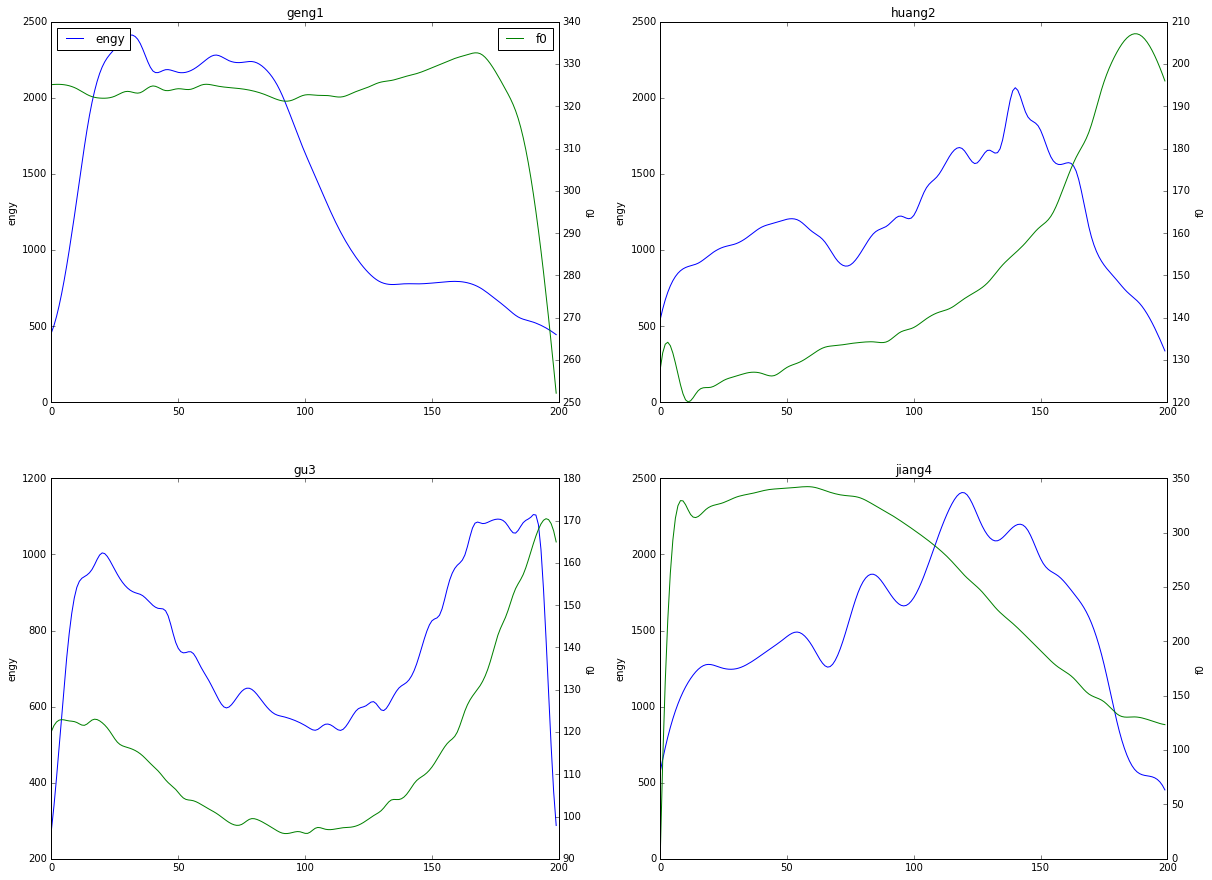

In [25]:
plot_data_engy_f0(sample_processed_data, '../doc/processed_data_engy_f0.eps')

# val loss

In [4]:
def read_val_loss(filename):
    with open(filename) as f:
        xs, ys = [], []
        for line in f:
            x, y = map(float, line.strip().split(','))
            xs.append(x)
            ys.append(y)
    return xs, ys

val_loss_xy_tf = read_val_loss('../doc/val_loss_cnn_tf.csv')
val_loss_xy_theano = read_val_loss('../doc/val_loss_cnn_theano.csv')
val_loss_xy_mxnet = read_val_loss('../doc/val_loss_cnn_mxnet.csv')

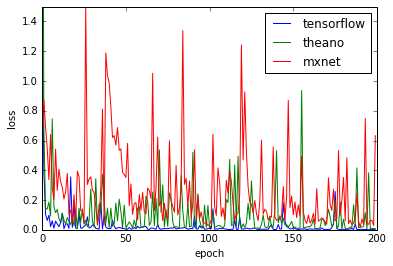

In [38]:
fig = plt.figure()
plt.plot(val_loss_xy_tf[0], val_loss_xy_tf[1], '-', label='tensorflow')
plt.plot(val_loss_xy_theano[0], val_loss_xy_theano[1], '-', label='theano')
plt.plot(val_loss_xy_mxnet[0], val_loss_xy_mxnet[1], '-', label='mxnet')
plt.ylim(0, 1.5)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
fig.savefig('../doc/val_loss_cnn.eps', dpi=300)
plt.show()
plt.close()

In [5]:
val_loss_xy_tf = read_val_loss('../doc/val_loss_dnn_tf.csv')
val_loss_xy_theano = read_val_loss('../doc/val_loss_dnn_theano.csv')
val_loss_xy_mxnet = read_val_loss('../doc/val_loss_dnn_mxnet.csv')

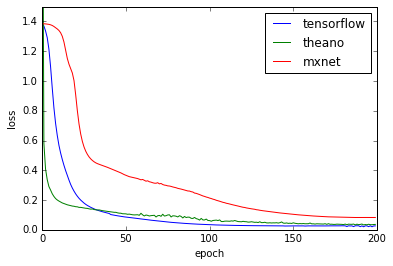

In [6]:
fig = plt.figure()
plt.plot(val_loss_xy_tf[0], val_loss_xy_tf[1], '-', label='tensorflow')
plt.plot(val_loss_xy_theano[0], val_loss_xy_theano[1], '-', label='theano')
plt.plot(val_loss_xy_mxnet[0], val_loss_xy_mxnet[1], '-', label='mxnet')
plt.ylim(0, 1.5)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
fig.savefig('../doc/val_loss_dnn.eps', dpi=300)
plt.show()
plt.close()